In [1]:
from k6221 import *
import plotly.express as px

In [2]:
rm = pyvisa.ResourceManager()
x = None

In [3]:
address = "TCPIP::10.0.4.138::1394::SOCKET"
dev = Keithley6221(address=address, rm=rm)


In [4]:
print(dev.get_idn())

KEITHLEY INSTRUMENTS INC.,MODEL 6221,4018989,D02  /700x 


In [11]:

def plotTrace(start_current = False,step_size=False):
    count = dev.get_trace_actual_data_points()
    print("Trace actual size", count)
    print("Trace buffer free size", dev.get_trace_free_memory())
    numbers = dev.get_trace_data()
    print(f"Trace length: {len(numbers)}")
    OutputUnits=dev.get_units().value.title()
    print(f"Output units : {OutputUnits}")
    if(len(numbers)<50):
        print(f"Trace numbers: ", numbers)
    points = [numbers[2 * i] for i in range(count)]
    if(start_current !=False and step_size !=False):
        currents = [start_current + i * step_size for i in range(points.__len__())]
        # plt.plot(currents, points, "o")
        # plt.xlabel("Current (A)")
        # plt.ylabel("Voltage (V)")
        # plt.title("Voltage vs Current")
        # plt.grid(True)
        # plt.show()
        fig = px.line(x=currents, y=points, labels={"x": "Current (A)", "y": f"{OutputUnits}"}, title=f"{OutputUnits} vs Current",markers=True)
        return fig.show()


       
    
    time_stamps = [numbers[2 * i + 1] for i in range(count)]
    print(f"Trace data type: {dev.get_trace_data_type()}")
    # plt.plot(time_stamps,points, "o")
    # plt.xlabel("Time (s)")
    # plt.ylabel("Voltage (V)")
    # plt.title("Voltage vs Time")
    # plt.grid(True)
    # return plt.show()
    fig = px.line(x=time_stamps, y=points, labels={"x": "Time (s)", "y": f"{OutputUnits}"}, title=f"{OutputUnits} vs Time", markers=True)
    return fig.show()
    

In [7]:
dev.get_units().value

'OHMS'

In [9]:
dev.RunDeltaMeasurements(
            units=dev.UNITS.Ohms,
            current=1e-6,
            delay=1,
            count="INF",
            swe_count=1,
    )

In [12]:
plotTrace()


Trace actual size 225
Trace buffer free size 2089952,7200
Trace length: 450
Output units : Ohms
Trace data type: DELT


In [13]:
dev.WriteCommand("SOUR:SWE:ABOR")


In [29]:
rm.close()

In [31]:
start_current = -900e-6
stop_current=900e-6
step_size=10e-6
delay=2e-3
delta=20e-6
buffer_points = int((stop_current - start_current) / step_size + 1)
estimated_time = buffer_points * (delay) + 10

time.sleep(5)
dev.RunDifferentialConductanceMeasurements(
    units=dev.UNITS.Volts,
    start_current=start_current,
    stop_current=stop_current,
    step_size=step_size,
    delay=delay,
    delta=delta,
    buffer_points=buffer_points,
    enable_compliance_abort=dev.ON_OFF_STATE.ON
    
)
# time.sleep(estimated_time)
# plotTrace()



And START_CURRENT =  -9.000000E-04
And STOP_CURRENT =  9.000000E-04
And STEP =  1.000000E-05
And DELTA =  0.00002
And DELAY =  0.00200
And CAB =  1
dIdV program is fully initialized!


In [30]:
plotTrace(start_current = start_current, step_size=step_size)

Trace actual size 181
Trace buffer free size 2091360,5792
Trace length: 362
Output units : V


<AxesSubplot:>

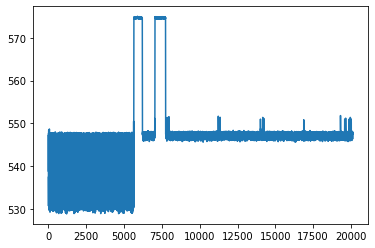

In [18]:
import pandas as pd
df= pd.read_csv("6221NoiseAnalysis.csv")
df['0'].plot()

In [12]:
dev.AbortSWE()


In [17]:
dev.WriteCommand("DISPlay:ENABle ON")

Trace actual size 21
Trace buffer free size 2096480,672
Trace length: 42
Trace numbers:  [533.893005, 0.0, 541.280273, 0.023, 551.302917, 0.046, 537.161011, 0.068, 530.252136, 0.091, 528.798462, 0.113, 528.601807, 0.136, 545.922607, 0.159, 552.550171, 0.182, 535.841125, 0.204, 533.135193, 0.227, 543.166077, 0.25, 539.940247, 0.273, 546.415283, 0.296, 552.334106, 0.318, 535.94165, 0.341, 533.538757, 0.364, 543.909851, 0.387, 540.34314, 0.409, 546.151062, 0.432, 550.578064, 0.455]
Trace data type: DCON


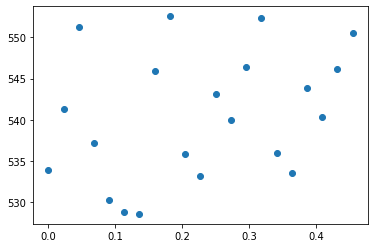

In [10]:
plotTrace()

In [22]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)

Trace actual size 1


In [32]:
dev.WriteCommand("SOUR:DCON:DELTa 1e-6")
dev.QueryCommand("SOUR:DCON:DELTa?")

'0.00000'

In [33]:
dev.QueryCommand(f"SOUR:DCON:STOP?")


'1.000000E-04'

In [6]:
dev.RunLinSweep(st=10e-6, en=100e-6, step=0.1e-6)

In [24]:
a="""*RST ‘ Restores 622x defaults.
SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.
SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.
SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.
SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.
SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.
SOUR:DCON:CAB ON ‘ Enables Compliance Abort.
TRAC:POIN 6 ‘ Sets buffer size to six points. A
SOUR:DCON:ARM ‘ Arms Differential Conductance.
INIT:IMM """

In [43]:
dev.WriteCommand("*RST")
dev.WriteCommand("SOUR:DCON:STARt 0 ")
dev.WriteCommand("SOUR:DCON:STEP 10e-6")
dev.WriteCommand("SOUR:DCON:STOP 50e-6")
dev.WriteCommand("SOUR:DCON:DELTa 20e-6 ")
dev.WriteCommand("SOUR:DCON:DELay 1e-3")
dev.WriteCommand("SOUR:DCON:CAB OFF")
dev.WriteCommand("TRAC:POIN 6")
dev.WriteCommand("SOUR:DCON:ARM")
dev.WriteCommand("INIT:IMM")

In [22]:
a

'*RST ‘ Restores 622x defaults.SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.SOUR:DCON:CAB ON ‘ Enables Compliance Abort.TRAC:POIN 6 ‘ Sets buffer size to six points. ASOUR:DCON:ARM ‘ Arms Differential Conductance.INIT:IMM '